In [8]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import pandas as pd
import numpy as np
import xarray as xr
import os

import pathlib

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

from sklearn import tree
import graphviz

from IPython.display import display, Markdown, Latex

%matplotlib inline
sns.set()

In [2]:
pip install osfclient

Note: you may need to restart the kernel to use updated packages.


### Fetching the dataset from the OSF


https://osf.io/rbhfz/


In [3]:
!osf -p rbhfz fetch oryza_sativa/GEMmakerGEMs/rice_heat_drought.GEM.raw.txt "C:\Users\ncnih\Desktop\Python\AFS 505 Class\Module 2\rice_heat_drought.GEM.raw.txt"

usage: osf fetch [-h] [-f] [-U] remote [local]
osf fetch: error: Local file C:\Users\ncnih\Desktop\Python\AFS 505 Class\Module 2\rice_heat_drought.GEM.raw.txt already exists, not overwriting.


In [4]:
!osf -p rbhfz fetch oryza_sativa/GEMmakerGEMs/raw_annotation_data/PRJNA301554.hydroponic.annotations.txt "C:\Users\ncnih\Desktop\Python\AFS 505 Class\Module 2\PRJNA301554.hydroponic.annotations.txt"

usage: osf fetch [-h] [-f] [-U] remote [local]
osf fetch: error: Local file C:\Users\ncnih\Desktop\Python\AFS 505 Class\Module 2\PRJNA301554.hydroponic.annotations.txt already exists, not overwriting.


In [9]:
#Setting the path of the downloaded files
import pathlib

In [10]:
RAW_COUNT_PATH = "C:/Users/ncnih/Desktop/Python/AFS 505 Class/Module 2/rice_heat_drought.GEM.raw.txt"

In [11]:
LABEL_PATH = "C:/Users/ncnih/Desktop/Python/AFS 505 Class/Module 2/PRJNA301554.hydroponic.annotations.txt"

In [12]:
pathlib.Path(RAW_COUNT_PATH).exists()

True

In [13]:
pathlib.Path(LABEL_PATH).exists()

True

In [14]:
pd.read_csv(pathlib.Path(RAW_COUNT_PATH), nrows=3)

SRX1423934\tSRX1423935\tSRX1423936\tSRX1423937\tSRX1423938\tSRX1423939\tSRX1423940\tSRX1423941\tSRX1423942\tSRX1423943\tSRX1423944\tSRX1423945\tSRX1423946\tSRX1423947\tSRX1423948\tSRX1423949\tSRX1423950\tSRX1423951\tSRX1423952\tSRX1423953\tSRX1423954\tSRX1423955\tSRX1423956\tSRX1423957\tSRX1423958\tSRX1423959\tSRX1423960\tSRX1423961\tSRX1423962\tSRX1423963\tSRX1423964\tSRX1423965\tSRX1423966\tSRX1423967\tSRX1423968\tSRX1423969\tSRX1423970\tSRX1423971\tSRX1423972\tSRX1423973\tSRX1423974\tSRX1423975\tSRX1423976\tSRX1423977\tSRX1423978\tSRX1423979\tSRX1423980\tSRX1423981\tSRX1423982\tSRX1423983\tSRX1423984\tSRX1423985\tSRX1423986\tSRX1423987\tSRX1423988\tSRX1423989\tSRX1423990\tSRX1423991\tSRX1423992\tSRX1423993\tSRX1423994\tSRX1423995\tSRX1423996\tSRX1423997\tSRX1423998\tSRX1423999\tSRX1424000\tSRX1424001\tSRX1424002\tSRX1424003\tSRX1424004\tSRX1424005\tSRX1424006\tSRX1424007\tSRX1424008\tSRX1424009\tSRX1424010\tSRX1424011\tSRX1424012\tSRX1424013\tSRX1424014\tSRX1424015\tSRX1424016\tSRX1424017\tSRX1424018\tSRX1424019\tSRX1424020\tSRX1424021\tSRX1424022\tSRX1424023\tSRX1424024\tSRX1424025\tSRX1424026\tSRX1424027\tSRX1424028\tSRX1424029\tSRX1424030\tSRX1424031\tSRX1424032\tSRX1424033\tSRX1424034\tSRX1424035\tSRX1424036\tSRX1424037\tSRX1424038\tSRX1424039\tSRX1424040\tSRX1424041\tSRX1424042\tSRX1424043\tSRX1424044\tSRX1424045\tSRX1424046\tSRX1424047\tSRX1424048\tSRX1424049\tSRX1424050\tSRX1424051\tSRX1424052\tSRX1424053\tSRX1424054\tSRX1424055\tSRX1424056\tSRX1424057\tSRX1424058\tSRX1424059\tSRX1424060\tSRX1424061\tSRX1424062\tSRX1424063\tSRX1424064\tSRX1424065\tSRX1424066\tSRX1424067\tSRX1424068\tSRX1424069\tSRX1424070\tSRX1424071\tSRX1424072\tSRX1424073\tSRX1424074\tSRX1424075\tSRX1424076\tSRX1424077\tSRX1424078\tSRX1424079\tSRX1424080\tSRX1424081\tSRX1424082\tSRX1424083\tSRX1424084\tSRX1424085\tSRX1424086\tSRX1424087\tSRX1424088\tSRX1424089\tSRX1424090\tSRX1424091\tSRX1424092\tSRX1424093\tSRX1424094\tSRX1424095\tSRX1424096\tSRX1424097\tSRX1424098\tSRX1424099\tSRX1424100\tSRX1424101\tSRX1424102\tSRX1424103\tSRX1424104\tSRX1424105\tSRX1424106\tSRX1424107\tSRX1424108\tSRX1424109\tSRX1424110\tSRX1424111\tSRX1424112\tSRX1424113\tSRX1424114\tSRX1424115\tSRX1424116\tSRX1424117\tSRX1424118\tSRX1424119\tSRX1424120\tSRX1424121\tSRX1424122\tSRX1424123\tSRX1424124\tSRX1424125\tSRX1424126\tSRX1424127\tSRX1424128\tSRX1424129\tSRX1424130\tSRX1424131\tSRX1424132\tSRX1424133\tSRX1424134\tSRX1424135\tSRX1424136\tSRX1424137\tSRX1424138\tSRX1424139\tSRX1424140\tSRX1424141\tSRX1424142\tSRX1424143\tSRX1424144\tSRX1424145\tSRX1424146\tSRX1424147\tSRX1424148\tSRX1424149\tSRX1424150\tSRX1424151\tSRX1424152\tSRX1424153\tSRX1424154\tSRX1424155\tSRX1424156\tSRX1424157\tSRX1424158\tSRX1424159\tSRX1424160\tSRX1424161\tSRX1424162\tSRX1424163\tSRX1424164\tSRX1424165\tSRX1424166\tSRX1424167\tSRX1424168\tSRX1424169\tSRX1424170\tSRX1424171\tSRX1424172\tSRX1424173\tSRX1424174\tSRX1424175\tSRX1424176\tSRX1424177\tSRX1424178\tSRX1424179\tSRX1424180\tSRX1424181\tSRX1424182\tSRX1424183\tSRX1424184\tSRX1424185\tSRX1424186\tSRX1424187\tSRX1424188\tSRX1424189\tSRX1424190\tSRX1424191\tSRX1424192\tSRX1424193\tSRX1424194\tSRX1424195\tSRX1424196\tSRX1424197\tSRX1424198\tSRX1424199\tSRX1424200\tSRX1424201\tSRX1424202\tSRX1424203\tSRX1424204\tSRX1424205\tSRX1424206\tSRX1424207\tSRX1424208\tSRX1424209\tSRX1424210\tSRX1424211\tSRX1424212\tSRX1424213\tSRX1424214\tSRX1424215\tSRX1424216\tSRX1424217\tSRX1424218\tSRX1424219\tSRX1424220\tSRX1424221\tSRX1424222\tSRX1424223\tSRX1424224\tSRX1424225\tSRX1424226\tSRX1424227\tSRX1424228\tSRX1424229\tSRX1424230\tSRX1424231\tSRX1424232\tSRX1424233\tSRX1424234\tSRX1424235\tSRX1424236\tSRX1424237\tSRX1424238\tSRX1424239\tSRX1424240\tSRX1424241\tSRX1424242\tSRX1424243\tSRX1424244\tSRX1424245\tSRX1424246\tSRX1424247\tSRX1424248\tSRX1424249\tSRX1424250\tSRX1424251\tSRX1424252\tSRX1424253\tSRX1424254\tSRX1424255\tSRX1424256\tSRX1424257\tSRX1424258\tSRX1424259\tSRX1424260\tSRX1424261\tSRX1424262\tSRX1424263\tSRX1424264\tSRX1424265\tSRX1424266\tSRX1

In [15]:
count_df=pd.read_csv(pathlib.Path(RAW_COUNT_PATH), sep="\t", index_col=0)#1st column is index so it doesn't generate 0,1,2 on the left as shown above
display(Markdown('## Count Data'))
print(count_df.shape)
display(count_df.head())

## Count Data

(55986, 475)


,SRX1423934,SRX1423935,SRX1423936,SRX1423937,SRX1423938,SRX1423939,SRX1423940,SRX1423941,SRX1423942,SRX1423943,...,SRX1424399,SRX1424400,SRX1424401,SRX1424402,SRX1424403,SRX1424404,SRX1424405,SRX1424406,SRX1424407,SRX1424408
LOC_Os06g05820,20,2,22,11,23,39,24,34,33,20,...,5,20,20,38,35,43,25,8,8,21
LOC_Os10g27460,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LOC_Os02g35980,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LOC_Os09g23260,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LOC_Os01g41670,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0


### Make a dataset

In [16]:
count_array = xr.Dataset(
    {"counts":(("Gene", "Sample"), count_df.values)},
    coords={
        "Sample": count_df.columns.values,
        "Gene": count_df.index.values
    }
)
#count_array=count_array.transpose() # same as count_array.T
#count_array()

In [17]:
count_array

<xarray.Dataset>
Dimensions:  (Gene: 55986, Sample: 475)
Coordinates:
  * Sample   (Sample) object 'SRX1423934' 'SRX1423935' ... 'SRX1424408'
  * Gene     (Gene) object 'LOC_Os06g05820' ... 'LOC_Os07g03418'
Data variables:
    counts   (Gene, Sample) int64 20 2 22 11 23 39 24 34 33 ... 0 1 0 0 0 0 0 0

In [18]:
count_array=count_array.transpose()

In [19]:
count_array

<xarray.Dataset>
Dimensions:  (Gene: 55986, Sample: 475)
Coordinates:
  * Sample   (Sample) object 'SRX1423934' 'SRX1423935' ... 'SRX1424408'
  * Gene     (Gene) object 'LOC_Os06g05820' ... 'LOC_Os07g03418'
Data variables:
    counts   (Sample, Gene) int64 20 0 0 0 0 0 200 102 ... 6 19 0 52 335 0 666 0

### Load Sample Lables

In [20]:
label_df=pd.read_csv(LABEL_PATH, index_col=1, sep="\t")
label_df['genotype']=label_df['genotype'].str.split(" ", expand = True).iloc[:,0]
label_df['time']=label_df['time'].str.split(' ', expand = True).iloc[:,0].astype(int)
label_df.index.rename('Sample', inplace=True)
label_df.head()

,BioSample,LoadDate,MBases,MBytes,Run,SRA_Sample,Sample_Name,genotype,time,treatment,...,Instrument,LibraryLayout,LibrarySelection,LibrarySource,Organism,Platform,ReleaseDate,SRA_Study,source_name,tissue
Sample,,,,,,,,,,,,,,,,,,,,,
SRX1423937,SAMN04251851,2015-11-20,1166,764,SRR2931043,SRS1156717,GSM1933349,Azuenca,30,CONTROL,...,Illumina HiSeq 2000,PAIRED,cDNA,TRANSCRIPTOMIC,Oryza sativa,ILLUMINA,2016-01-04,SRP065945,Rice leaf,leaf
SRX1423938,SAMN04251852,2015-11-20,4005,2500,SRR2931044,SRS1156720,GSM1933350,Azuenca,45,CONTROL,...,Illumina HiSeq 2000,PAIRED,cDNA,TRANSCRIPTOMIC,Oryza sativa,ILLUMINA,2016-01-04,SRP065945,Rice leaf,leaf
SRX1423939,SAMN04251853,2015-11-20,4852,3262,SRR2931045,SRS1156719,GSM1933351,Azuenca,45,CONTROL,...,Illumina HiSeq 2000,PAIRED,cDNA,TRANSCRIPTOMIC,Oryza sativa,ILLUMINA,2016-01-04,SRP065945,Rice leaf,leaf
SRX1423940,SAMN04251854,2015-11-20,3610,2437,SRR2931046,SRS1156716,GSM1933352,Azuenca,60,CONTROL,...,Illumina HiSeq 2000,PAIRED,cDNA,TRANSCRIPTOMIC,Oryza sativa,ILLUMINA,2016-01-04,SRP065945,Rice leaf,leaf
SRX1423941,SAMN04251855,2015-11-20,6065,4013,SRR2931047,SRS1156714,GSM1933353,Azuenca,60,CONTROL,...,Illumina HiSeq 2000,PAIRED,cDNA,TRANSCRIPTOMIC,Oryza sativa,ILLUMINA,2016-01-04,SRP065945,Rice leaf,leaf


In [21]:
label_df.index.intersection(count_df.columns.values) #to check if we have setup the labels correctly

Index(['SRX1423937', 'SRX1423938', 'SRX1423939', 'SRX1423940', 'SRX1423941',
       'SRX1423942', 'SRX1423943', 'SRX1423944', 'SRX1423945', 'SRX1423946',
       ...
       'SRX1424399', 'SRX1424400', 'SRX1424401', 'SRX1424402', 'SRX1424403',
       'SRX1424404', 'SRX1424405', 'SRX1424406', 'SRX1424407', 'SRX1424408'],
      dtype='object', name='Sample', length=475)

In [22]:
label_df.index.symmetric_difference(count_df.columns.values) 

Index([], dtype='object', name='Sample')

In [23]:
label_ds = label_df.to_xarray()
label_ds

<xarray.Dataset>
Dimensions:             (Sample: 475)
Coordinates:
  * Sample              (Sample) object 'SRX1423937' ... 'SRX1424408'
Data variables: (12/28)
    BioSample           (Sample) object 'SAMN04251851' ... 'SAMN04251607'
    LoadDate            (Sample) object '2015-11-20' ... '2015-11-19'
    MBases              (Sample) int64 1166 4005 4852 3610 ... 3098 3529 2922
    MBytes              (Sample) int64 764 2500 3262 2437 ... 1983 2370 1862
    Run                 (Sample) object 'SRR2931043' ... 'SRR2931514'
    SRA_Sample          (Sample) object 'SRS1156717' ... 'SRS1156251'
    ...                  ...
    Organism            (Sample) object 'Oryza sativa' ... 'Oryza sativa'
    Platform            (Sample) object 'ILLUMINA' 'ILLUMINA' ... 'ILLUMINA'
    ReleaseDate         (Sample) object '2016-01-04' ... '2016-01-04'
    SRA_Study           (Sample) object 'SRP065945' 'SRP065945' ... 'SRP065945'
    source_name         (Sample) object 'Rice leaf' 'Rice leaf' ... 'Rice leaf'
    tissue              (Sample) object 'leaf' 'leaf' 'leaf' ... 'leaf' 'leaf'

In [24]:
ds = label_ds.merge(count_array)
ds

<xarray.Dataset>
Dimensions:             (Sample: 475, Gene: 55986)
Coordinates:
  * Sample              (Sample) object 'SRX1423934' ... 'SRX1424408'
  * Gene                (Gene) object 'LOC_Os06g05820' ... 'LOC_Os07g03418'
Data variables: (12/29)
    BioSample           (Sample) object 'SAMN04251848' ... 'SAMN04251607'
    LoadDate            (Sample) object '2015-11-20' ... '2015-11-19'
    MBases              (Sample) int64 4016 5202 4053 1166 ... 3098 3529 2922
    MBytes              (Sample) int64 2738 3652 2719 764 ... 1983 2370 1862
    Run                 (Sample) object 'SRR2931040' ... 'SRR2931514'
    SRA_Sample          (Sample) object 'SRS1156722' ... 'SRS1156251'
    ...                  ...
    Platform            (Sample) object 'ILLUMINA' 'ILLUMINA' ... 'ILLUMINA'
    ReleaseDate         (Sample) object '2016-01-04' ... '2016-01-04'
    SRA_Study           (Sample) object 'SRP065945' 'SRP065945' ... 'SRP065945'
    source_name         (Sample) object 'Rice leaf' 'Rice leaf' ... 'Rice leaf'
    tissue              (Sample) object 'leaf' 'leaf' 'leaf' ... 'leaf' 'leaf'
    counts              (Sample, Gene) int64 20 0 0 0 0 0 ... 0 52 335 0 666 0

In [25]:
ds.to_netcdf('pryza_sativa_gem.nc')

In [26]:
treatment_groups = ds.groupby('treatment').groups
type(treatment_groups)

dict

In [27]:
treatment_groups.keys()

dict_keys(['CONTROL', 'DROUGHT', 'HEAT', 'RECOV_DROUGHT', 'RECOV_HEAT'])

In [28]:
#treatment_groups['CONTROL']

In [29]:
ds.isel(Sample=treatment_groups['CONTROL'])

<xarray.Dataset>
Dimensions:             (Sample: 143, Gene: 55986)
Coordinates:
  * Sample              (Sample) object 'SRX1423934' ... 'SRX1424324'
  * Gene                (Gene) object 'LOC_Os06g05820' ... 'LOC_Os07g03418'
Data variables: (12/29)
    BioSample           (Sample) object 'SAMN04251848' ... 'SAMN04251611'
    LoadDate            (Sample) object '2015-11-20' ... '2015-11-19'
    MBases              (Sample) int64 4016 5202 4053 1166 ... 2372 4031 3165
    MBytes              (Sample) int64 2738 3652 2719 764 ... 1543 2588 2069
    Run                 (Sample) object 'SRR2931040' ... 'SRR2931430'
    SRA_Sample          (Sample) object 'SRS1156722' ... 'SRS1156334'
    ...                  ...
    Platform            (Sample) object 'ILLUMINA' 'ILLUMINA' ... 'ILLUMINA'
    ReleaseDate         (Sample) object '2016-01-04' ... '2016-01-04'
    SRA_Study           (Sample) object 'SRP065945' 'SRP065945' ... 'SRP065945'
    source_name         (Sample) object 'Rice leaf' 'Rice leaf' ... 'Rice leaf'
    tissue              (Sample) object 'leaf' 'leaf' 'leaf' ... 'leaf' 'leaf'
    counts              (Sample, Gene) int64 20 0 0 0 0 0 ... 0 12 112 0 44 0

In [30]:
ds[['counts', 'treatment']].to_dataframe()

counts      treatment
Sample     Gene                                 
SRX1423934 LOC_Os06g05820      20        CONTROL
           LOC_Os10g27460       0        CONTROL
           LOC_Os02g35980       0        CONTROL
           LOC_Os09g23260       0        CONTROL
           LOC_Os01g41670       0        CONTROL
...                           ...            ...
SRX1424408 LOC_Os03g12900      52  RECOV_DROUGHT
           LOC_Os10g36690     335  RECOV_DROUGHT
           LOC_Os03g50190       0  RECOV_DROUGHT
           LOC_Os03g20020     666  RECOV_DROUGHT
           LOC_Os07g03418       0  RECOV_DROUGHT

[26593350 rows x 2 columns]

In [31]:
ds['counts']

<xarray.DataArray 'counts' (Sample: 475, Gene: 55986)>
array([[ 20,   0,   0, ...,   0, 637,   0],
       [  2,   0,   0, ...,   0, 186,   0],
       [ 22,   0,   0, ...,   0, 545,   0],
       ...,
       [  8,   0,   0, ...,   0, 411,   0],
       [  8,   0,   0, ...,   0, 311,   0],
       [ 21,   0,   0, ...,   0, 666,   0]], dtype=int64)
Coordinates:
  * Sample   (Sample) object 'SRX1423934' 'SRX1423935' ... 'SRX1424408'
  * Gene     (Gene) object 'LOC_Os06g05820' ... 'LOC_Os07g03418'

In [32]:
ds['counts'].values

array([[ 20,   0,   0, ...,   0, 637,   0],
       [  2,   0,   0, ...,   0, 186,   0],
       [ 22,   0,   0, ...,   0, 545,   0],
       ...,
       [  8,   0,   0, ...,   0, 411,   0],
       [  8,   0,   0, ...,   0, 311,   0],
       [ 21,   0,   0, ...,   0, 666,   0]], dtype=int64)

In [33]:
ds['treatment']

<xarray.DataArray 'treatment' (Sample: 475)>
array(['CONTROL', 'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL',
       'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL',
       'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL',
       'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL',
       'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL',
       'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL', 'HEAT',
       'HEAT', 'HEAT', 'HEAT', 'HEAT', 'HEAT', 'HEAT', 'HEAT', 'HEAT',
       'HEAT', 'HEAT', 'HEAT', 'HEAT', 'HEAT', 'HEAT', 'HEAT', 'HEAT',
       'HEAT', 'HEAT', 'HEAT', 'HEAT', 'HEAT', 'HEAT', 'HEAT', 'HEAT',
       'HEAT', 'HEAT', 'HEAT', 'HEAT', 'HEAT', 'HEAT', 'HEAT',
       'RECOV_HEAT', 'RECOV_HEAT', 'RECOV_HEAT', 'RECOV_HEAT',
       'RECOV_HEAT', 'RECOV_HEAT', 'RECOV_HEAT', 'RECOV_HEAT',
       'RECOV_HEAT', 'RECOV_HEAT', 'RECOV_HEAT', 'RECOV_HEAT',
       'RECOV_HEAT', 'RECOV_HEAT', 'RECOV_HEAT', 'RECOV_HEAT', 'DROUGHT',
       'DROUGHT', 'DROUGHT', 'DROUGHT', 'DROUGHT', 'DROUGHT', 'DROUGHT',
       'DROUGHT', 'DROUGHT', 'DROUGHT', 'DROUGHT', 'DROUGHT', 'DROUGHT',
       'DROUGHT', 'DROUGHT', 'DROUGHT', 'DROUGHT', 'DROUGHT',
       'RECOV_DROUGHT', 'RECOV_DROUGHT', 'RECOV_DROUGHT', 'RECOV_DROUGHT',
       'RECOV_DROUGHT', 'RECOV_DROUGHT', 'RECOV_DROUGHT', 'RECOV_DROUGHT',
       'RECOV_DROUGHT', 'RECOV_DROUGHT', 'RECOV_DROUGHT', 'RECOV_DROUGHT',
...
       'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL',
       'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL',
       'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL',
       'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL',
       'HEAT', 'HEAT', 'HEAT', 'HEAT', 'HEAT', 'HEAT', 'HEAT', 'HEAT',
       'HEAT', 'HEAT', 'HEAT', 'HEAT', 'HEAT', 'HEAT', 'HEAT', 'HEAT',
       'HEAT', 'HEAT', 'HEAT', 'HEAT', 'HEAT', 'HEAT', 'HEAT', 'HEAT',
       'HEAT', 'HEAT', 'HEAT', 'HEAT', 'HEAT', 'HEAT', 'HEAT', 'HEAT',
       'RECOV_HEAT', 'RECOV_HEAT', 'RECOV_HEAT', 'RECOV_HEAT',
       'RECOV_HEAT', 'RECOV_HEAT', 'RECOV_HEAT', 'RECOV_HEAT',
       'RECOV_HEAT', 'RECOV_HEAT', 'RECOV_HEAT', 'RECOV_HEAT',
       'RECOV_HEAT', 'RECOV_HEAT', 'RECOV_HEAT', 'RECOV_HEAT', 'DROUGHT',
       'DROUGHT', 'DROUGHT', 'DROUGHT', 'DROUGHT', 'DROUGHT', 'DROUGHT',
       'DROUGHT', 'DROUGHT', 'DROUGHT', 'DROUGHT', 'DROUGHT', 'DROUGHT',
       'DROUGHT', 'DROUGHT', 'DROUGHT', 'DROUGHT', 'DROUGHT',
       'RECOV_DROUGHT', 'RECOV_DROUGHT', 'RECOV_DROUGHT', 'RECOV_DROUGHT',
       'RECOV_DROUGHT', 'RECOV_DROUGHT', 'RECOV_DROUGHT', 'RECOV_DROUGHT',
       'RECOV_DROUGHT', 'RECOV_DROUGHT', 'RECOV_DROUGHT', 'RECOV_DROUGHT',
       'RECOV_DROUGHT', 'RECOV_DROUGHT', 'RECOV_DROUGHT', 'RECOV_DROUGHT',
       'RECOV_DROUGHT', 'RECOV_DROUGHT'], dtype=object)
Coordinates:
  * Sample   (Sample) object 'SRX1423934' 'SRX1423935' ... 'SRX1424408'

In [34]:
sub_ds=ds.isel(Sample=treatment_groups['CONTROL'], Gene=[0, 42,999])
sub_ds

<xarray.Dataset>
Dimensions:             (Sample: 143, Gene: 3)
Coordinates:
  * Sample              (Sample) object 'SRX1423934' ... 'SRX1424324'
  * Gene                (Gene) object 'LOC_Os06g05820' ... 'LOC_Os04g49510'
Data variables: (12/29)
    BioSample           (Sample) object 'SAMN04251848' ... 'SAMN04251611'
    LoadDate            (Sample) object '2015-11-20' ... '2015-11-19'
    MBases              (Sample) int64 4016 5202 4053 1166 ... 2372 4031 3165
    MBytes              (Sample) int64 2738 3652 2719 764 ... 1543 2588 2069
    Run                 (Sample) object 'SRR2931040' ... 'SRR2931430'
    SRA_Sample          (Sample) object 'SRS1156722' ... 'SRS1156334'
    ...                  ...
    Platform            (Sample) object 'ILLUMINA' 'ILLUMINA' ... 'ILLUMINA'
    ReleaseDate         (Sample) object '2016-01-04' ... '2016-01-04'
    SRA_Study           (Sample) object 'SRP065945' 'SRP065945' ... 'SRP065945'
    source_name         (Sample) object 'Rice leaf' 'Rice leaf' ... 'Rice leaf'
    tissue              (Sample) object 'leaf' 'leaf' 'leaf' ... 'leaf' 'leaf'
    counts              (Sample, Gene) int64 20 1 822 2 1 320 ... 0 877 7 0 295

In [35]:
sub_ds['treatment']

<xarray.DataArray 'treatment' (Sample: 143)>
array(['CONTROL', 'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL',
       'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL',
       'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL',
       'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL',
       'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL',
       'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL',
       'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL',
       'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL',
       'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL',
       'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL',
       'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL',
       'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL',
       'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL',
       'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL',
       'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL',
       'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL',
       'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL',
       'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL',
       'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL',
       'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL',
       'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL',
       'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL',
       'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL',
       'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL', 'CONTROL'],
      dtype=object)
Coordinates:
  * Sample   (Sample) object 'SRX1423934' 'SRX1423935' ... 'SRX1424324'

C:\Users\ncnih\anaconda3\lib\site-packages\xarray\core\computation.py:727: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
C:\Users\ncnih\anaconda3\lib\site-packages\xarray\core\computation.py:727: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


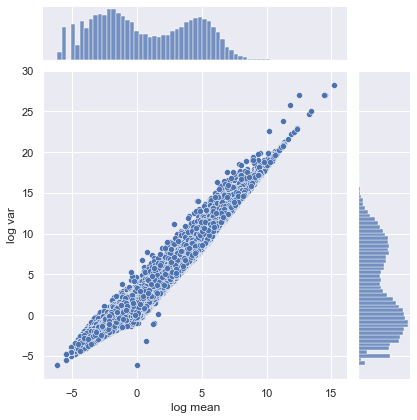

In [36]:
sns.jointplot(
    data={'log mean': np.log(ds['counts'].mean(dim='Sample')),
          'log var': np.log(ds['counts'].var(dim='Sample')),},
    x="log mean",
    y="log var")

### Machine learning in Python

https://scikit-learn.org/stable/index.html

Others incudle  <br>
1)TensorFlow  https://www.tensorflow.org/    <br>
2)Keras https://keras.io/   <br>
3)PyTorch https://pytorch.org/  <br>

![](SK_learn_FC.png)

## Collaborative Feature Selection from Oryza sative RNA-Seq Data

### Understanding the data

In [37]:
ds['counts']

<xarray.DataArray 'counts' (Sample: 475, Gene: 55986)>
array([[ 20,   0,   0, ...,   0, 637,   0],
       [  2,   0,   0, ...,   0, 186,   0],
       [ 22,   0,   0, ...,   0, 545,   0],
       ...,
       [  8,   0,   0, ...,   0, 411,   0],
       [  8,   0,   0, ...,   0, 311,   0],
       [ 21,   0,   0, ...,   0, 666,   0]], dtype=int64)
Coordinates:
  * Sample   (Sample) object 'SRX1423934' 'SRX1423935' ... 'SRX1424408'
  * Gene     (Gene) object 'LOC_Os06g05820' ... 'LOC_Os07g03418'

In [38]:
ds['counts'].values

array([[ 20,   0,   0, ...,   0, 637,   0],
       [  2,   0,   0, ...,   0, 186,   0],
       [ 22,   0,   0, ...,   0, 545,   0],
       ...,
       [  8,   0,   0, ...,   0, 411,   0],
       [  8,   0,   0, ...,   0, 311,   0],
       [ 21,   0,   0, ...,   0, 666,   0]], dtype=int64)

In [39]:
ds['counts'].values.shape

(475, 55986)

In [40]:
ds['counts'].values.flatten().shape

(26593350,)

In [41]:
log_count = np.log(ds['counts'].values+1) 
log_count

array([[3.04452244, 0.        , 0.        , ..., 0.        , 6.45833828,
        0.        ],
       [1.09861229, 0.        , 0.        , ..., 0.        , 5.23110862,
        0.        ],
       [3.13549422, 0.        , 0.        , ..., 0.        , 6.30261898,
        0.        ],
       ...,
       [2.19722458, 0.        , 0.        , ..., 0.        , 6.02102335,
        0.        ],
       [2.19722458, 0.        , 0.        , ..., 0.        , 5.74300319,
        0.        ],
       [3.09104245, 0.        , 0.        , ..., 0.        , 6.50279005,
        0.        ]])

In [42]:
mean_log_counts=np.mean(np.log(ds['counts'].values+1), axis = 0)

In [43]:
mean_log_counts

array([2.17255852e+00, 2.46976549e-02, 1.31333150e-02, ...,
       2.31286798e-03, 5.88904109e+00, 2.04296011e-02])

<AxesSubplot:ylabel='Density'>

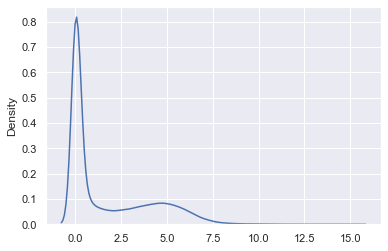

In [44]:
sns.kdeplot(mean_log_counts)

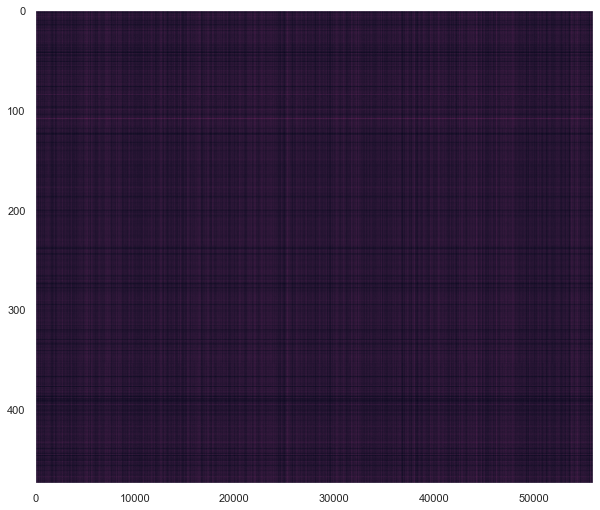

In [45]:
fig,ax = plt.subplots(figsize=(10,10))
ax.imshow(np.log(ds['counts'].values+1),aspect=100)
ax.grid(False);

#we see the straiation here instead of a big black slab - meaning our data looks good

#### Reducing the dimensiosn of data using PCA - Principal Component Analysis

https://scikit-learn.org/stable/modules/decomposition.html#principal-component-analysis-pca

In [46]:
from sklearn.decomposition import PCA

In [47]:
pca_mdl = PCA()
log_count_pca=pca_mdl.fit_transform(log_count)
log_count_pca

array([[ 3.71083465e+01, -6.80748013e+01,  3.73915904e+00, ...,
        -2.65764157e+00, -6.33623762e-01,  4.79322795e-13],
       [-1.16908587e+02, -5.95479552e+01, -2.57066642e+00, ...,
        -1.94957644e+00, -2.33761485e+00,  4.79322795e-13],
       [ 5.15338830e+01, -6.36330321e+01,  3.69364220e+00, ...,
         3.23306510e+00, -2.39841732e+00,  4.79322795e-13],
       ...,
       [ 3.18142913e+00,  4.84749089e+01,  3.41973907e+01, ...,
         2.19397439e+00,  3.71499476e+00,  4.79322795e-13],
       [ 3.71766015e+00,  6.55399547e+01,  4.15729865e+01, ...,
        -1.89953370e+00, -5.19962029e-01,  4.79322795e-13],
       [ 2.25096000e+00,  6.23461870e+01,  3.82760479e+01, ...,
         6.49696666e+00, -7.10947965e+00,  4.79322795e-13]])

In [48]:
log_count_pca.shape

(475, 475)

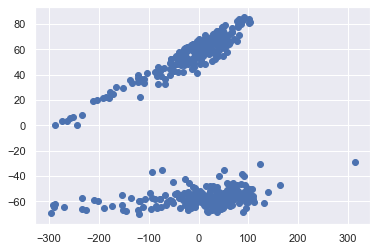

In [49]:
x = log_count_pca[:,0]  #two components
y = log_count_pca[:,1]

fig,ax=plt.subplots()
ax.scatter(x,y);

In [50]:
labels= ds[['treatment', 'time','genotype']].to_dataframe()

In [51]:
print(labels.shape)
labels.head(5)

(475, 3)


,treatment,time,genotype
Sample,,,
SRX1423934,CONTROL,15,Azuenca
SRX1423935,CONTROL,15,Azuenca
SRX1423936,CONTROL,30,Azuenca
SRX1423937,CONTROL,30,Azuenca
SRX1423938,CONTROL,45,Azuenca


In [52]:
labels['pca_1'] = log_count_pca[:,0]
labels['pca_2'] = log_count_pca[:,1]


labels.head(3)


,treatment,time,genotype,pca_1,pca_2
Sample,,,,,
SRX1423934,CONTROL,15,Azuenca,37.108346,-68.074801
SRX1423935,CONTROL,15,Azuenca,-116.908587,-59.547955
SRX1423936,CONTROL,30,Azuenca,51.533883,-63.633032


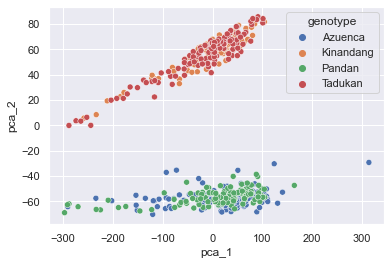

In [53]:
sns.scatterplot(data=labels, x='pca_1', y='pca_2', hue='genotype', legend='brief');

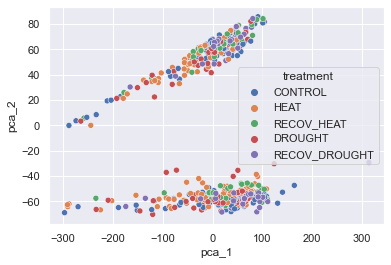

In [54]:
sns.scatterplot(data=labels, x='pca_1', y='pca_2', hue='treatment', legend='brief');

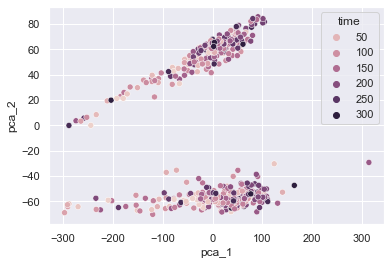

In [55]:
sns.scatterplot(data=labels, x='pca_1', y='pca_2', hue='time', legend='brief');

## UMAP

Uniform Manifold Approximation and Projection (UMAP) -  dimension reduction technique - visualisation, but also for general non-linear dimension reduction.

https://umap-learn.readthedocs.io/en/latest/parameters.html

In [56]:
conda install -c conda-forge umap-learn

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [57]:
pip install umap-learn

In [58]:
import umap


In [59]:
reducer=umap.UMAP()

In [60]:
embedding = reducer.fit_transform(log_count)

In [61]:
embedding.shape

(475, 2)

In [62]:
labels['genotype'].unique()

array(['Azuenca', 'Kinandang', 'Pandan', 'Tadukan'], dtype=object)

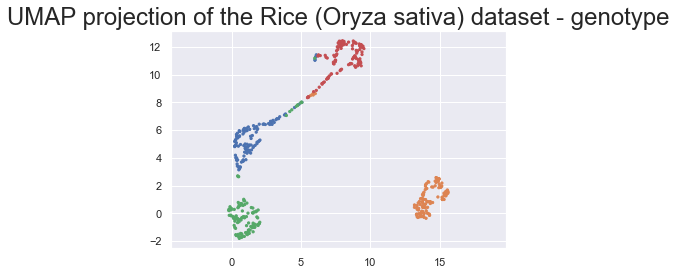

In [63]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    s=5,
    c=[sns.color_palette()[x] for x in labels['genotype'].map({'Azuenca':0, 'Kinandang':1, 'Pandan':2,   'Tadukan':3})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Rice (Oryza sativa) dataset - genotype', fontsize=24);

In [64]:
#[sns.color_palette()[x] for x in labels['genotype'].map({'Azuenca':0, 'Kinandang':1, 'Pandan':2,   'Tadukan':3})]

In [65]:
labels['treatment'].unique()

array(['CONTROL', 'HEAT', 'RECOV_HEAT', 'DROUGHT', 'RECOV_DROUGHT'],
      dtype=object)

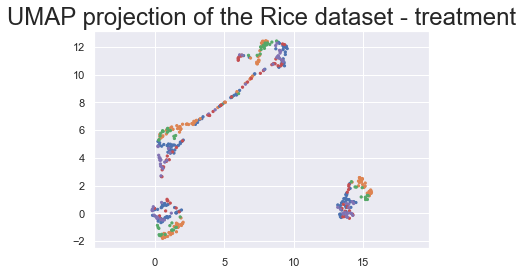

In [66]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    s=5,
    c=[sns.color_palette()[x] for x in labels['treatment'].map({'CONTROL':0, 'HEAT':1, 'RECOV_HEAT':2,   'DROUGHT':3, 'RECOV_DROUGHT':4 })])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Rice dataset - treatment', fontsize=24);

# Feature Selection

https://scikit-learn.org/stable/modules/feature_selection.html

 RandomForestClassifier - Non-linear models
 
 - each tree in the ensemble - built by bootstrapping method - sample drawn with replacemnet from the training set
 
 https://scikit-learn.org/stable/modules/ensemble.html

In [67]:
from sklearn.ensemble import RandomForestClassifier

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier

In [68]:
clf = RandomForestClassifier(max_depth=2, random_state=9) #keep the same random_state number to get reproducible results - doesn't matter what number 
clf.fit(log_count, labels['treatment'].values)

RandomForestClassifier(max_depth=2, random_state=9)

In [69]:
log_count.shape

(475, 55986)

In [70]:
#labels['treatment'].values

In [71]:
clf.feature_importances_

#Feature importances are provided by the fitted attribute feature_importances_ and they are computed as the mean and standard deviation of accumulation of the impurity decrease within each tree.

array([0., 0., 0., ..., 0., 0., 0.])

In [72]:
clf.score(log_count, labels['treatment'].values)

#score - what percent of the did the fit get correctly - here it is 78% - which is pretty good

0.7810526315789473

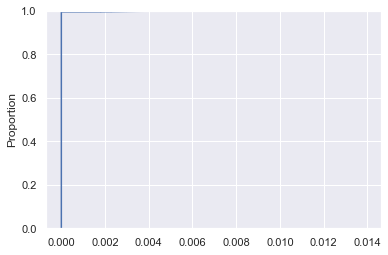

In [73]:
sns.ecdfplot(clf.feature_importances_); #previosuly we just saw zeros for the feature_importances - however, greter the values are better

In [74]:
clf.feature_importances_ > 0 #so checking any above 0

array([False, False, False, ..., False, False, False])

In [75]:
(clf.feature_importances_ > 0).sum() # so 270 features greater than zero

270

In [76]:
ds

<xarray.Dataset>
Dimensions:             (Sample: 475, Gene: 55986)
Coordinates:
  * Sample              (Sample) object 'SRX1423934' ... 'SRX1424408'
  * Gene                (Gene) object 'LOC_Os06g05820' ... 'LOC_Os07g03418'
Data variables: (12/29)
    BioSample           (Sample) object 'SAMN04251848' ... 'SAMN04251607'
    LoadDate            (Sample) object '2015-11-20' ... '2015-11-19'
    MBases              (Sample) int64 4016 5202 4053 1166 ... 3098 3529 2922
    MBytes              (Sample) int64 2738 3652 2719 764 ... 1983 2370 1862
    Run                 (Sample) object 'SRR2931040' ... 'SRR2931514'
    SRA_Sample          (Sample) object 'SRS1156722' ... 'SRS1156251'
    ...                  ...
    Platform            (Sample) object 'ILLUMINA' 'ILLUMINA' ... 'ILLUMINA'
    ReleaseDate         (Sample) object '2016-01-04' ... '2016-01-04'
    SRA_Study           (Sample) object 'SRP065945' 'SRP065945' ... 'SRP065945'
    source_name         (Sample) object 'Rice leaf' 'Rice leaf' ... 'Rice leaf'
    tissue              (Sample) object 'leaf' 'leaf' 'leaf' ... 'leaf' 'leaf'
    counts              (Sample, Gene) int64 20 0 0 0 0 0 ... 0 52 335 0 666 0

In [77]:
clf.feature_importances_.shape

(55986,)

In [78]:
ds.sel(Gene=clf.feature_importances_>0) #so selection of the 270 genes

<xarray.Dataset>
Dimensions:             (Sample: 475, Gene: 270)
Coordinates:
  * Sample              (Sample) object 'SRX1423934' ... 'SRX1424408'
  * Gene                (Gene) object 'LOC_Os03g59760' ... 'LOC_Os10g37340'
Data variables: (12/29)
    BioSample           (Sample) object 'SAMN04251848' ... 'SAMN04251607'
    LoadDate            (Sample) object '2015-11-20' ... '2015-11-19'
    MBases              (Sample) int64 4016 5202 4053 1166 ... 3098 3529 2922
    MBytes              (Sample) int64 2738 3652 2719 764 ... 1983 2370 1862
    Run                 (Sample) object 'SRR2931040' ... 'SRR2931514'
    SRA_Sample          (Sample) object 'SRS1156722' ... 'SRS1156251'
    ...                  ...
    Platform            (Sample) object 'ILLUMINA' 'ILLUMINA' ... 'ILLUMINA'
    ReleaseDate         (Sample) object '2016-01-04' ... '2016-01-04'
    SRA_Study           (Sample) object 'SRP065945' 'SRP065945' ... 'SRP065945'
    source_name         (Sample) object 'Rice leaf' 'Rice leaf' ... 'Rice leaf'
    tissue              (Sample) object 'leaf' 'leaf' 'leaf' ... 'leaf' 'leaf'
    counts              (Sample, Gene) int64 854 66 65 1126 ... 85 681 863 309

In [79]:
ds['Gene'].values[clf.feature_importances_ >0] 

array(['LOC_Os03g59760', 'LOC_Os02g43410', 'LOC_Os06g50930',
       'LOC_Os03g05800', 'LOC_Os04g45480', 'LOC_Os03g21210',
       'LOC_Os10g42780', 'LOC_Os07g39280', 'LOC_Os11g14180',
       'LOC_Os11g45250', 'LOC_Os03g13850', 'LOC_Os03g02260',
       'LOC_Os06g28630', 'LOC_Os02g32504', 'LOC_Os05g48290',
       'LOC_Os01g04370', 'LOC_Os01g04380', 'LOC_Os03g64260',
       'LOC_Os05g38530', 'LOC_Os07g48560', 'LOC_Os05g47870',
       'LOC_Os05g25260', 'LOC_Os05g23140', 'LOC_Os02g28170',
       'LOC_Os07g08970', 'LOC_Os09g34900', 'LOC_Os03g17950',
       'LOC_Os01g12390', 'LOC_Os01g03330', 'LOC_Os03g27800',
       'LOC_Os11g11340', 'LOC_Os03g07360', 'LOC_Os09g37620',
       'LOC_Os02g35500', 'LOC_Os03g15720', 'LOC_Os01g47190',
       'LOC_Os06g03670', 'LOC_Os04g31270', 'LOC_Os06g25010',
       'LOC_Os08g01910', 'LOC_Os03g05110', 'LOC_Os10g39920',
       'LOC_Os02g15930', 'LOC_Os01g02060', 'LOC_Os02g54140',
       'LOC_Os08g02540', 'LOC_Os04g46330', 'LOC_Os06g04070',
       'LOC_Os06g12370',

In [80]:
sel_genes = ds['Gene'].values[clf.feature_importances_ >0] #creating a dataset of the selected 270 genes

In [81]:
log_count.shape

(475, 55986)

In [82]:
log_count[:, clf.feature_importances_ >0].shape

(475, 270)

In [83]:
sel_count = log_count[:, clf.feature_importances_ >0]

In [84]:
sel_count

array([[6.75110147, 4.20469262, 4.18965474, ..., 6.11146734, 5.52146092,
        5.420535  ],
       [5.52545294, 2.48490665, 3.40119738, ..., 5.47227067, 4.98360662,
        4.72738782],
       [6.59030105, 5.06259503, 3.13549422, ..., 6.27852142, 5.39362755,
        5.12396398],
       ...,
       [6.54678541, 1.94591015, 4.62497281, ..., 6.53087763, 5.42495002,
        5.65248918],
       [6.43133108, 2.99573227, 3.40119738, ..., 6.15273269, 5.86078622,
        5.33271879],
       [6.315358  , 4.14313473, 3.4339872 , ..., 6.52502966, 6.76157277,
        5.7365723 ]])

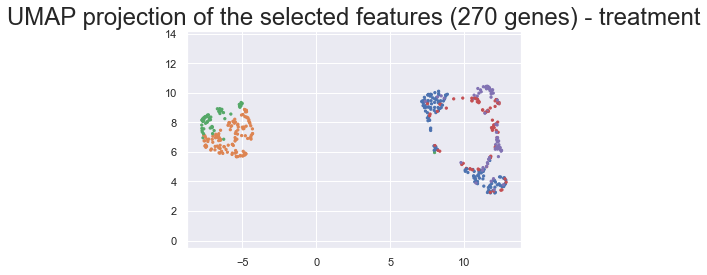

In [85]:
reducer=umap.UMAP( random_state=9) #keep the same random state 
embedding = reducer.fit_transform(sel_count)

plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    s=5,
    c=[sns.color_palette()[x] for x in labels['treatment'].map({'CONTROL':0, 'HEAT':1, 'RECOV_HEAT':2,   'DROUGHT':3, 'RECOV_DROUGHT':4 })])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the selected features (270 genes) - treatment', fontsize=24);

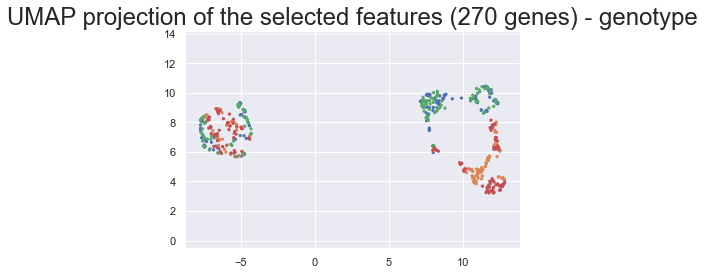

In [86]:
reducer=umap.UMAP(random_state=9)  #keep the same random state 
embedding = reducer.fit_transform(sel_count)

plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    s=5,
    c=[sns.color_palette()[x] for x in labels['genotype'].map({'Azuenca':0, 'Kinandang':1, 'Pandan':2,   'Tadukan':3 })])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the selected features (270 genes) - genotype', fontsize=24);

more structure in the treatment map when compared to genotype

#### From the treatment and genotype UMAPs we can conclude that the selected 270 genes are doing someting similar based on the treatment irrespective of the genotype

In [87]:
clf.estimators_  #information on the decision trees used in the background

[DecisionTreeClassifier(max_depth=2, max_features='auto', random_state=44556670),
 DecisionTreeClassifier(max_depth=2, max_features='auto',
                        random_state=1565348188),
 DecisionTreeClassifier(max_depth=2, max_features='auto', random_state=8051326),
 DecisionTreeClassifier(max_depth=2, max_features='auto',
                        random_state=2143748597),
 DecisionTreeClassifier(max_depth=2, max_features='auto',
                        random_state=2129330102),
 DecisionTreeClassifier(max_depth=2, max_features='auto', random_state=32397368),
 DecisionTreeClassifier(max_depth=2, max_features='auto', random_state=574793467),
 DecisionTreeClassifier(max_depth=2, max_features='auto',
                        random_state=1358173078),
 DecisionTreeClassifier(max_depth=2, max_features='auto', random_state=610362493),
 DecisionTreeClassifier(max_depth=2, max_features='auto', random_state=57217601),
 DecisionTreeClassifier(max_depth=2, max_features='auto', random_state=9387

In [88]:
from sklearn import tree

[Text(167.4, 181.2, 'LOC_Os03g27800 <= 6.101\ngini = 0.78\nsamples = 298\nvalue = [128, 68, 134, 78, 67]'),
 Text(83.7, 108.72, 'LOC_Os01g08860 <= 4.171\ngini = 0.715\nsamples = 153\nvalue = [37, 34, 105, 10, 59]'),
 Text(41.85, 36.23999999999998, 'gini = 0.635\nsamples = 47\nvalue = [34, 27, 2, 7, 3]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.533\nsamples = 106\nvalue = [3, 7, 103, 3, 56]'),
 Text(251.10000000000002, 108.72, 'LOC_Os01g50910 <= 2.602\ngini = 0.717\nsamples = 145\nvalue = [91, 34, 29, 68, 8]'),
 Text(209.25, 36.23999999999998, 'gini = 0.607\nsamples = 88\nvalue = [79, 10, 26, 14, 7]'),
 Text(292.95, 36.23999999999998, 'gini = 0.587\nsamples = 57\nvalue = [12, 24, 3, 54, 1]')]

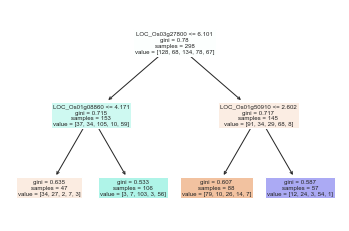

In [89]:
tree.plot_tree(clf.estimators_[0], feature_names = ds['Gene'].values, filled=True)

In [101]:
conda install graphviz

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [105]:
# import graphviz #better looking decison tree

# data = tree.export_graphviz(clf.estimators_[0], out_file=None, 
#                      feature_names=ds['Gene'].values,  
#                      class_names=labels['treatment'].unique(), #double check order 
#                      filled=True, rounded=True,  
#                      special_characters=True)  
# graph = graphviz.Source(data)  
# graph 